In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


# Import Libraries

In [69]:
#basic
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing and splitting
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, FunctionTransformer, LabelEncoder

#model building and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

#setting random seed
rs=42

# Load Dataset

In [70]:
train = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [71]:
train.shape

(100000, 76)

In [72]:
train.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


# EDA

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

*   The dataset has 48 numerical and 28 catagorical columns.

## Unique Values

In [74]:
#let's check how many unique values each column has

pd.set_option('display.max_rows', None)

unique_values = pd.DataFrame({
    'Column Name': train.columns,
    'Unique Values Count': [train[col].nunique() for col in train.columns]
})

# Display the result in a tabulated format
print(unique_values.sort_values(by='Unique Values Count'))

                           Column Name  Unique Values Count
5                           IsBetaUser                    1
62                   IsFlightsDisabled                    1
25         AutoSampleSubmissionEnabled                    1
75                              target                    2
59                        IsPortableOS                    2
40                 HasOpticalDiskDrive                    2
66                 IsSecureBootEnabled                    2
67                     IsVirtualDevice                    2
68                      IsTouchEnabled                    2
69                        IsPenCapable                    2
28                     FirewallEnabled                    2
26                               SMode                    2
24                   IsSystemProtected                    2
31                        DeviceFamily                    2
70    IsAlwaysOnAlwaysConnectedCapable                    2
7                 IsPassiveModeEnabled  

*    ***IsBetaUser, IsFlightsDisabled, AutoSampleSubmissionEnabled*** are to be dropped as they have only 1 unique value and hence no variance.

* ***MachineID*** is also to be dropped as it is just ID and does not have predictive power.

*  Many cols have only 2 unique values, likely binary and would require more domain knowledge to determine whether to drop them or not.

* However many of these binary cols are in the dataset as float values so we need to make them integers.

## Null Values

In [75]:
# Calculate percentage of missing values per column
missing = (train.isnull().sum())

# Create a DataFrame to display the results in a tabulated format
missing_values_table = pd.DataFrame({
    'Column Name': train.columns,
    'No. of Missing Values': missing.values
}).sort_values(by='No. of Missing Values', ascending=False)

# Display the result
print(missing_values_table)

                           Column Name  No. of Missing Values
26                               SMode                    981
13                              CityID                    623
72                    RegionIdentifier                    559
71                             IsGamer                    559
47      InternalBatteryNumberOfCharges                    515
64              FirmwareManufacturerID                    376
65                   FirmwareVersionID                    334
62                   IsFlightsDisabled                    326
33                          OEMModelID                    228
32                           OEMNameID                    212
28                     FirewallEnabled                    166
41                  TotalPhysicalRAMMB                    151
70    IsAlwaysOnAlwaysConnectedCapable                    134
56                 OSInstallLanguageID                    113
37               PrimaryDiskCapacityMB                    110
39      

In [76]:
train.isnull().any(axis=1).sum()

3305

* We would have to impute these null values. And since most of our columns are categorical, and even that those are represented as numbers are actually categorical, imputing with most frequent strategy seems appropriate as of now.
* We cannot drop these values as the test dataset might also have nulls.

## Checking if Target is Balanced

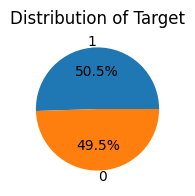

In [77]:
data_counts = train['target'].value_counts()
labels = data_counts.index  
sizes = data_counts.values  

plt.figure(figsize=(2, 2))  
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Target')
plt.show()

*   The target is balanced.

## Correlations via Heatmap

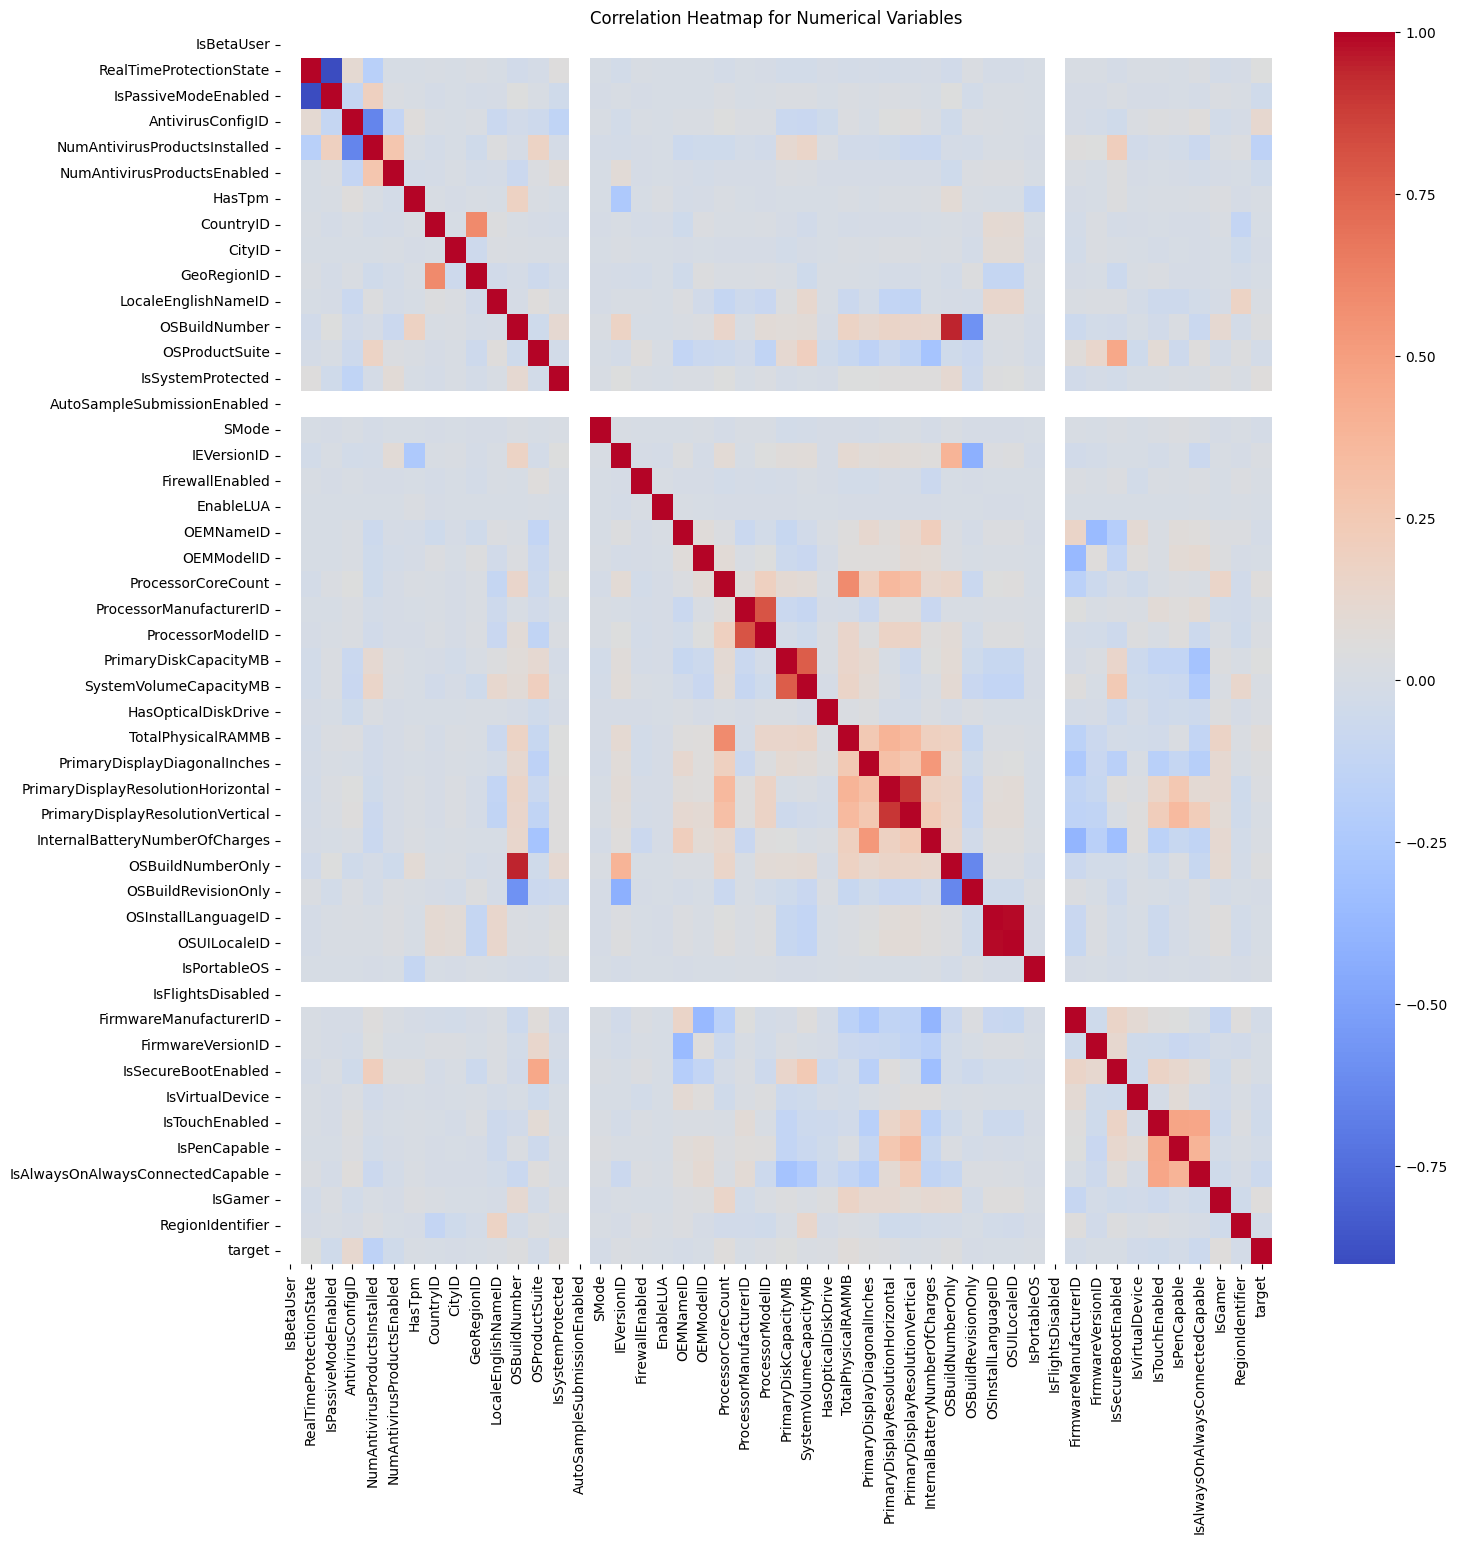

In [78]:
num_cols = train.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = train[num_cols].corr()

plt.figure(figsize=(16,16))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

*   We observe that ***OSBuildNumber, OSBuildNumberOnly*** are one and the same so one needs to be dropped.

*   The cols ***RealTimeProtectionState, IsPassiveModeEnabled*** show high negative corr. That is because they both indicate which mode the anti-virus software is in. The first one has more values likely corresponding  to values such as enabled, disabled, allowing certain softwares, working in background etc. While the second one only indicates whether in passive mode or not.

* If ***RealTimeProtectionState*** is disabled, it could imply that ***IsPassiveModeEnabled*** is true (passive mode), hence the correlation and we will drop the first column due its moderate cardinality.

*   The cols ***OSUILocaleID*** and ***OSInstallLanguageID*** are also highly correlated, as they mean largely the same thing. The LocaleID has more cardinality so we might drop it.

* ***PrimaryDisplayResolutionHorizontal*** and ***PrimaryDisplayResolutionVertical*** show high correlation which is obvious as when screen resolutions increase they increase both horizontally and vertically. They can be combined into display resolution.

## Checking Variables with less cardinality

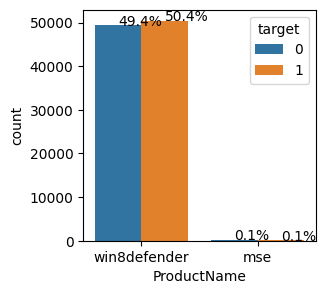

In [79]:
#product name

plt.figure(figsize=(3,3))

ax=sns.countplot(x='ProductName', data=train, hue='target')

for bar in ax.containers:
    for b in bar:
        percentage = 100 * b.get_height() / 100000
        ax.text(
            b.get_x() + b.get_width() / 2,
            b.get_height(),
            f'{percentage:.1f}%',
        )

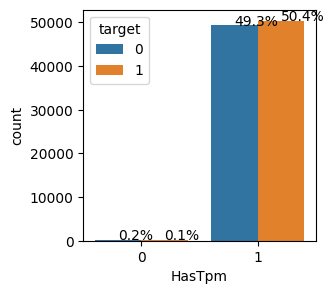

In [80]:
#hastpm

plt.figure(figsize=(3,3))

ax=sns.countplot(x='HasTpm', data=train, hue='target')

for bar in ax.containers:
    for b in bar:
        percentage = 100 * b.get_height() / 100000
        ax.text(
            b.get_x() + b.get_width() / 2,
            b.get_height(),
            f'{percentage:.1f}%',
        )

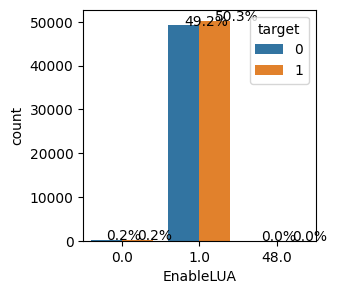

In [81]:
#EnableLUA

plt.figure(figsize=(3,3))

ax=sns.countplot(x='EnableLUA', data=train, hue='target')

for bar in ax.containers:
    for b in bar:
        percentage = 100 * b.get_height() / 100000
        ax.text(
            b.get_x() + b.get_width() / 2,
            b.get_height(),
            f'{percentage:.1f}%',
        )

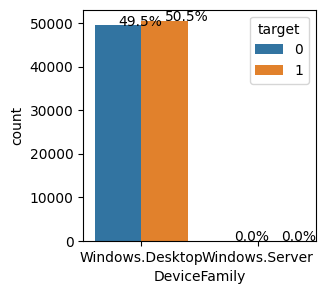

In [82]:
#DeviceFamily

plt.figure(figsize=(3,3))

ax=sns.countplot(x='DeviceFamily', data=train, hue='target')

for bar in ax.containers:
    for b in bar:
        percentage = 100 * b.get_height() / 100000
        ax.text(
            b.get_x() + b.get_width() / 2,
            b.get_height(),
            f'{percentage:.1f}%',
        )

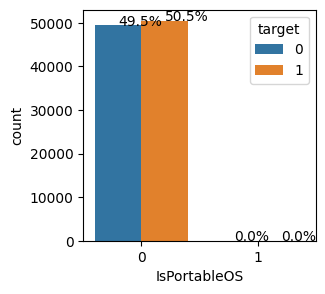

In [83]:
#IsPortableOS

plt.figure(figsize=(3,3))

ax=sns.countplot(x='IsPortableOS', data=train, hue='target')

for bar in ax.containers:
    for b in bar:
        percentage = 100 * b.get_height() / 100000
        ax.text(
            b.get_x() + b.get_width() / 2,
            b.get_height(),
            f'{percentage:.1f}%',
        )

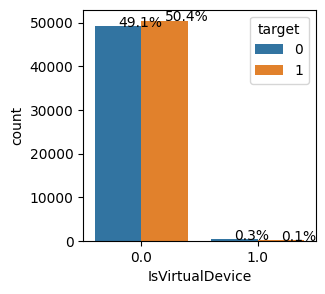

In [84]:
#IsVirtualDevice

plt.figure(figsize=(3,3))

ax=sns.countplot(x='IsVirtualDevice', data=train, hue='target')

for bar in ax.containers:
    for b in bar:
        percentage = 100 * b.get_height() / 100000
        ax.text(
            b.get_x() + b.get_width() / 2,
            b.get_height(),
            f'{percentage:.1f}%',
        )

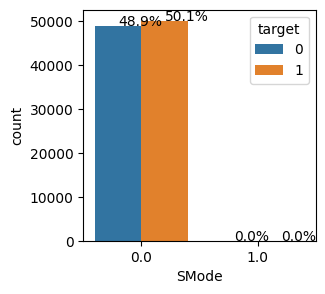

In [85]:
#SMode

plt.figure(figsize=(3,3))

ax=sns.countplot(x='SMode', data=train, hue='target')

for bar in ax.containers:
    for b in bar:
        percentage = 100 * b.get_height() / 100000
        ax.text(
            b.get_x() + b.get_width() / 2,
            b.get_height(),
            f'{percentage:.1f}%',
        )

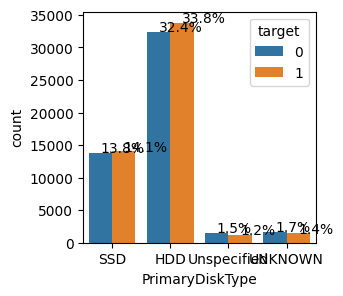

In [86]:
#IsPenCapable

plt.figure(figsize=(3,3))

ax=sns.countplot(x='PrimaryDiskType', data=train, hue='target')

for bar in ax.containers:
    for b in bar:
        percentage = 100 * b.get_height() / 100000
        ax.text(
            b.get_x() + b.get_width() / 2,
            b.get_height(),
            f'{percentage:.1f}%',
        )

* From above, we will drop columns with one value comprising of nearly 99% of data.

# Feature Engineering

## Display Resolution

In [87]:
#converting them to int cuz they are stored as float unnecessarily
cols=['PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical']

train[cols]=train[cols].astype('Int64')
test[cols]=test[cols].astype('Int64')

In [88]:
def displayresolution(horz, verc):
    return f'{horz} x {verc}'

train['DisplayResolution'] = train.apply(lambda x: displayresolution(x['PrimaryDisplayResolutionHorizontal'], x['PrimaryDisplayResolutionVertical']), axis=1)
test['DisplayResolution'] = test.apply(lambda x: displayresolution(x['PrimaryDisplayResolutionHorizontal'], x['PrimaryDisplayResolutionVertical']), axis=1)

# Preprocessing

## Seperating Target

In [89]:
y=train['target']
train=train.drop(columns=['target'])

## Pipeline for dropping rows and converting datatypes

In [90]:
def drop_columns(X):
    X=X.drop(columns=['MachineID','ProductName', 'IsBetaUser', 'HasTpm', "AutoSampleSubmissionEnabled", 'EnableLUA', 
                           'DeviceFamily', 'IsPortableOS', "IsFlightsDisabled", 'IsVirtualDevice', 'SMode', 'OSBuildNumberOnly', 
                           'RealTimeProtectionState', 'OSInstallLanguageID', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical'])
    return X

def convert_to_int(X):
    cols=["AntivirusConfigID", "CityID", "GeoRegionID", "NumAntivirusProductsInstalled", "NumAntivirusProductsEnabled", "IsSystemProtected", 
          "IEVersionID", "FirewallEnabled", "OEMNameID", "OEMModelID", "ProcessorCoreCount", "ProcessorManufacturerID",	"ProcessorModelID", 
          "PrimaryDiskCapacityMB", "SystemVolumeCapacityMB", "TotalPhysicalRAMMB", "FirmwareManufacturerID", "FirmwareVersionID", 
          "IsAlwaysOnAlwaysConnectedCapable", "IsGamer", "RegionIdentifier"]
    X[cols]=X[cols].astype("Int64")
    return X

pipeline = Pipeline(steps=[
    ('drop_columns', FunctionTransformer(drop_columns)),
    ('convert_to_int', FunctionTransformer(convert_to_int)) 
])

In [91]:
train = pipeline.fit_transform(train)
test = pipeline.transform(test)

## Train Validation Split

In [92]:
#splitting before further steps as they require learning and we dont 
#want data leakage by learning anything from the test set

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=rs)

## Imputing

* Imputing null rows in X_train as test has null rows too and we cant drop them.

In [93]:
num_cols = X_train.select_dtypes(include=['number']).columns
cat_cols = X_train.select_dtypes(exclude=['number']).columns

In [94]:
si = SimpleImputer(strategy='most_frequent') 

X_train[num_cols] = si.fit_transform(X_train[num_cols])
X_test[num_cols] = si.transform(X_test[num_cols])
test[num_cols] = si.transform(test[num_cols])

X_train[cat_cols] = si.fit_transform(X_train[cat_cols])
X_test[cat_cols] = si.transform(X_test[cat_cols])
test[cat_cols] = si.transform(test[cat_cols])

## Scaling

In [95]:
num_cols = X_train.select_dtypes(include=['number']).columns

#robust scaler
robsca = RobustScaler()

# Apply RobustScaler to numerical columns
X_train[num_cols] = robsca.fit_transform(X_train[num_cols])
X_test[num_cols] = robsca.transform(X_test[num_cols])
test[num_cols] = robsca.transform(test[num_cols])

## Encoding

* One Hot Encoding categorical columns for Random Forest and XGBoost as they can't handle categorical columns directly.

In [96]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_encoded = ohe.fit_transform(X_train[cat_cols])
X_test_encoded = ohe.transform(X_test[cat_cols])
test_encoded = ohe.transform(test[cat_cols])

encoded_columns = ohe.get_feature_names_out(cat_cols)

X_train_ohe = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
X_test_ohe = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)
test_ohe = pd.DataFrame(test_encoded, columns=encoded_columns, index=test.index)


## Converting object to category for LGBM

* Converting all columns with datatype object to datatype category as LGBMClassifier can handle categorical datatypes directly.

In [97]:
object_cols=X_train.select_dtypes(include=['object']).columns

for col in object_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')
    test[col]= test[col].astype('category')

# Models

In [98]:
# ValueError: feature_names must be string, and may not contain [, ] or < 
#for XGB

X_train_ohe.columns = X_train_ohe.columns.str.replace(r'[<>\[\] ]', '_', regex=True)
X_test_ohe.columns = X_test_ohe.columns.str.replace(r'[<>\[\] ]', '_', regex=True)

test.columns = test.columns.str.replace(r'[<>\[\] ]', '_', regex=True)

## RandomForest

In [99]:
rf=RandomForestClassifier(n_estimators=500, max_depth=30, random_state=rs, 
                          verbose=0, n_jobs=-1)

rf.fit(X_train_ohe, y_train)

print(f'Train score: {accuracy_score(y_train, rf.predict(X_train_ohe))}')
print(f'Validation score: {accuracy_score(y_test, rf.predict(X_test_ohe))}')

Train score: 0.7251142857142857
Validation score: 0.5825333333333333


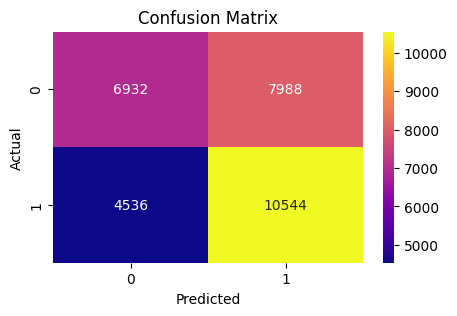

In [100]:
plt.figure(figsize=(5,3))

cm = confusion_matrix(y_test, rf.predict(X_test_ohe))
sns.heatmap(data=cm, annot=True, fmt="d", cmap='plasma')

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

* The model seems to predict more positives (1s) than negatives (0s), as indicated by the high number of false positives (7,988). This could suggest a bias toward predicting the positive class.

## XGBoost

In [101]:
XGB=XGBClassifier(n_estimators=300, max_depth=7, n_jobs=-1, random_state=rs)

XGB.fit(X_train_ohe, y_train)

print(f'Train score: {accuracy_score(y_train, XGB.predict(X_train_ohe))}')
print(f'Validation score: {accuracy_score(y_test, XGB.predict(X_test_ohe))}')

Train score: 0.6819714285714286
Validation score: 0.5841333333333333


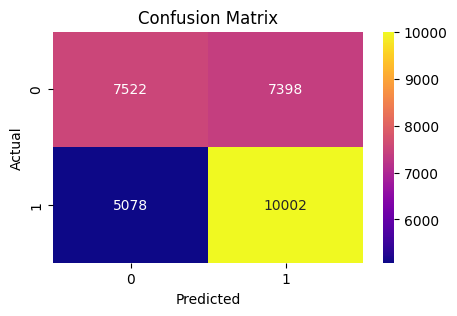

In [102]:
plt.figure(figsize=(5,3))

cm = confusion_matrix(y_test, XGB.predict(X_test_ohe))
sns.heatmap(data=cm, annot=True, fmt="d", cmap='plasma')

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

* The results of the 0 class again show that the model predicts much more false positives than false negatives and has a bias towards the class 1.

## LGBMClassifier

In [103]:
lgbm=LGBMClassifier(n_estimators=100, num_leaves=30, random_state=rs, 
                    verbose=-1, n_jobs=-1)

lgbm.fit(X_train, y_train)

print(f'Train score: {accuracy_score(y_train, lgbm.predict(X_train))}')
print(f'Validation score: {accuracy_score(y_test, lgbm.predict(X_test))}')

Train score: 0.7428285714285714
Validation score: 0.6141333333333333


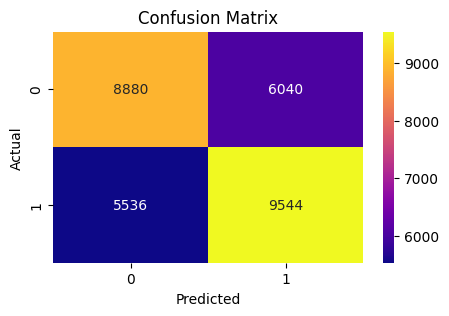

In [104]:
plt.figure(figsize=(5,3))

cm = confusion_matrix(y_test, lgbm.predict(X_test))
sns.heatmap(data=cm, annot=True, fmt="d", cmap='plasma')

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

* Remarkable difference from the previous 2 models is that there is a relatively balanced distribution of predictions across classes but still a significant number of false positives (6,040) and false negatives (5,536).

# Comparision of the Models by Accuracy

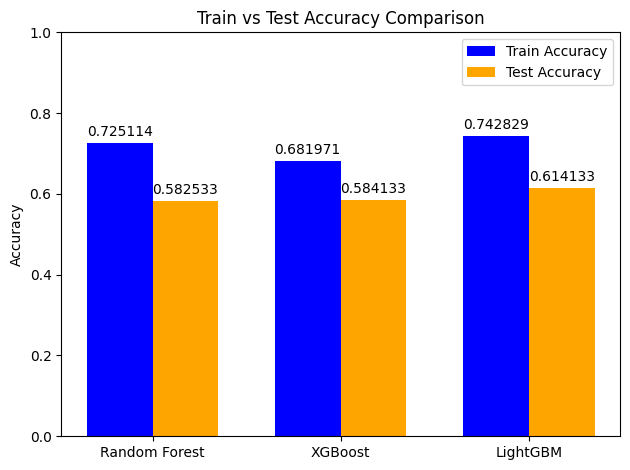

In [105]:
rf_train_accuracy = accuracy_score(y_train, rf.predict(X_train_ohe))
XGB_train_accuracy = accuracy_score(y_train, XGB.predict(X_train_ohe))
lgbm_train_accuracy = accuracy_score(y_train, lgbm.predict(X_train))

rf_test_accuracy = accuracy_score(y_test, rf.predict(X_test_ohe))
XGB_test_accuracy = accuracy_score(y_test, XGB.predict(X_test_ohe))
lgbm_test_accuracy = accuracy_score(y_test, lgbm.predict(X_test))

labels = ['Random Forest', 'XGBoost', 'LightGBM']
train_scores = [rf_train_accuracy, XGB_train_accuracy, lgbm_train_accuracy]
test_scores = [rf_test_accuracy, XGB_test_accuracy, lgbm_test_accuracy]

x = np.arange(len(labels))  
width = 0.35               

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_scores, width, label='Train Accuracy', color='blue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test Accuracy', color='orange')

ax.set_ylabel('Accuracy')
ax.set_title('Train vs Test Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.set_ylim(0, 1)  

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

* The train accuracy is consistently higher than the test accuracy. This indicates that the models may be overfitting to the training data.
* LightGBM achieves the highest train accuracy (0.74) and test accuracy (0.61), showing that it performs better overall compared to Random Forest and XGBoost.
* RandomForest has a noticable gap between train and test accuracy, meaning its overfitting the most.
* XGBoost is generalizing a bit better than Random Forest.

# HyperParameterTuning

In [106]:
params = {
    'num_leaves': np.random.randint(20, 51, size=50),    
    'learning_rate': np.random.uniform(0.01, 0.2, size=50),  
    'n_estimators': np.random.randint(50, 300, size=50),     
}

lgbm2 = LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=42)

random_search = RandomizedSearchCV(estimator=lgbm2, param_distributions=params,
                                   n_iter=20, scoring='roc_auc', cv=3, 
                                   verbose=2, random_state=rs, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best AUC Score:", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'num_leaves': 26, 'n_estimators': 190, 'learning_rate': 0.026757945192566072}
Best AUC Score: 0.6427915449301146


In [110]:
#LGBM with tuned values
lgbm=LGBMClassifier(n_estimators=190, num_leaves=26, learning_rate='0.026', 
                    random_state=rs, verbose=-1, n_jobs=-1)

lgbm.fit(X_train, y_train)

print(f'Train score: {accuracy_score(y_train, lgbm.predict(X_train))}')
print(f'Validation score: {accuracy_score(y_test, lgbm.predict(X_test))}')

Train score: 0.6918571428571428
Validation score: 0.6133


* After HPT, the model is generalising equal in validation, but actually scored less in submission.

# Submission

In [108]:
# prediction=lgbm.predict(test)

# submission = pd.DataFrame({'id':test.index,'target': prediction})

# submission.to_csv('submission.csv', index=False)

# submission.head()

In [113]:
train = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')